<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Clusteriza%C3%A7%C3%A3o_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

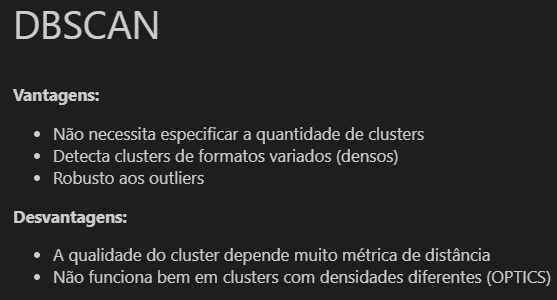

Veja o formato esférico do DBSCAN, ele consegue identificar isso como cluster pq ele vai considerar as densidades dos pontos, aonde tem mais pontos juntos ele vai acabar colocando no mesmo cluster, que é diferente do KMeans.

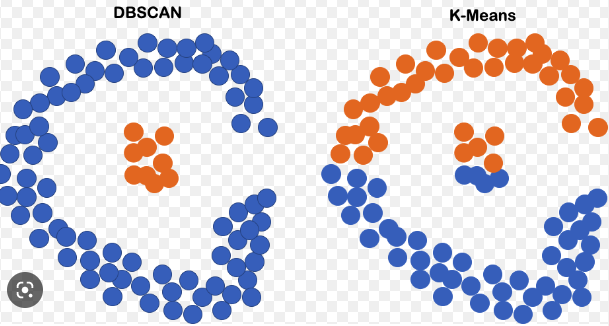

DBSCAN:

Requer dados numéricos contínuos na mesma escala;

Requer dois parâmetros obrigatórios, que é o EPS (Epsilon) que é a distância máxima do raio e min_samples que é a quantidade mínima de pontos dentro do raio

Robusto a outliers, diferente do KMeans, por exemplo

EPS:


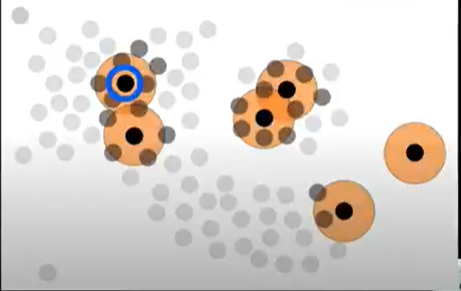

Imagine esse ponto preto acima, o EPS vai ser a distância máxima aonde ele pode considerar um outro ponto como vizinho dele ou não.

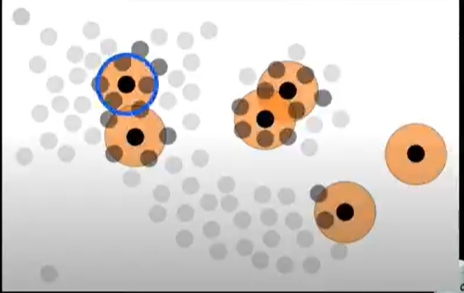

min_samples:

Só vou considerar o ponto preto como central se dentro do limite de distância que foi estabelecido no EPS tiver pelo menos a quantidade mínima de amostras.

Funciona bem quando os clusters são densos e bem separados por regiões de baixa densidade.

Como funciona o DBSCAN, 

basicamente ele vai considerar todos os pontos do conjunto de dados. Se desenharmos um círculo em volta do ponto vermelho, o tamanho do circulo vai ser definido pelo EPS, ele vai ver quantas observações tem dentro dele:

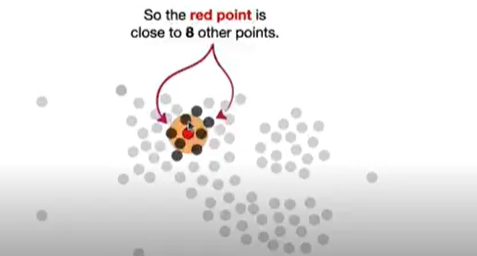

Vemos que têm oito pontos que encostou de alguma forma, isso é mais do que a quantidade mínima aceitável (que é o raio que tem dentro dele). Caso isso seja verdade, isso vai ser chamado de ponto central. Isso vai se repetir pra os outros pontos.

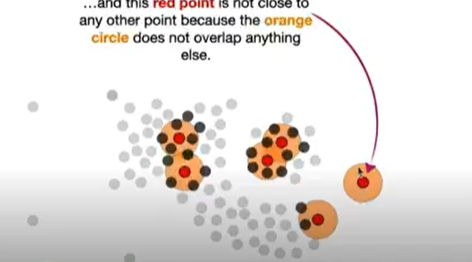

Observe na figura acima que o ponto setado não tem a quantidade mínima que é aceitável (4 pontos), então ele não vai ser um core points




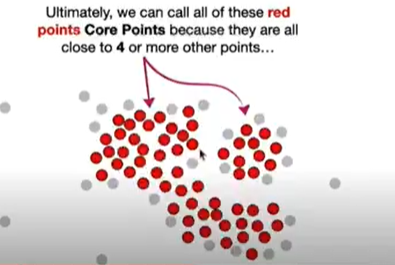

Na figura acima após feito todas as análises dos pontos verificou que esses são os pontos que obedecem a regra, cores points do algoritmo.

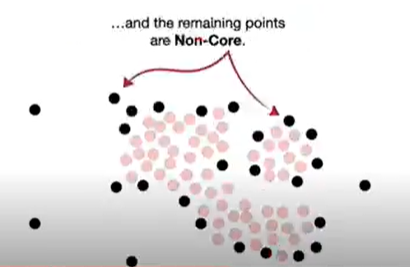

Esses na figura acima são os que não são core points

Agora escolhemos um dos core points e coloca ele como se fosse o primeiro cluster:

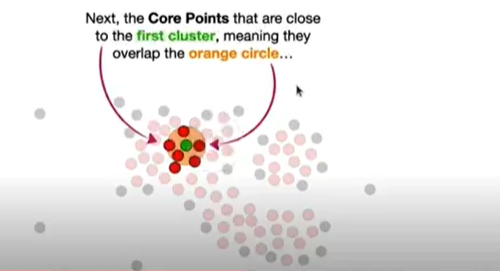

Agora vamos começar a produzir os clusters, me baseei na densidade pq é onde se tem mais pontos.

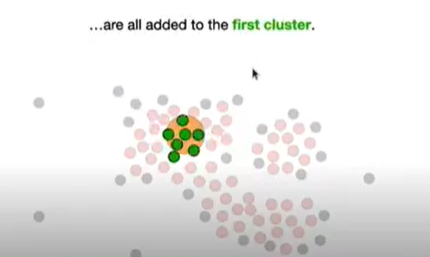

Todos os pontos verdes são clusters

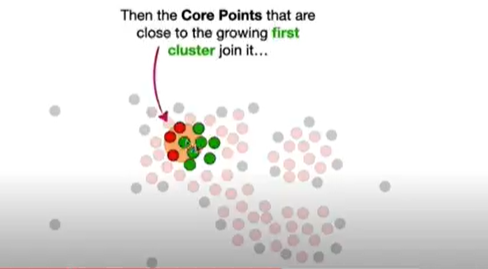

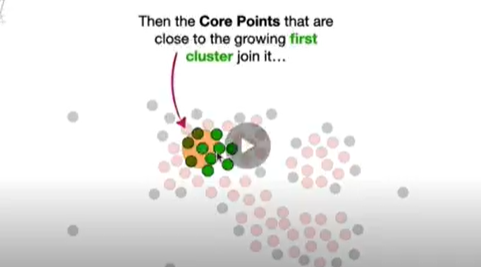

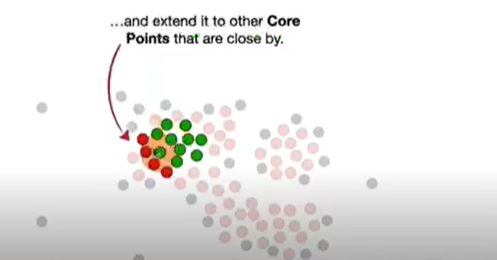

Vai fazendo isso até que essa regra não vai ser estabelecida:

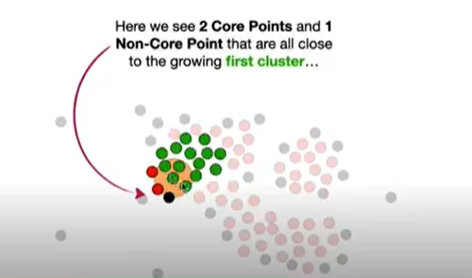

Observe que o ponto preto faz parte do core points porém ele por si só não possui quatro pontos, então esse ponto vai ser chamado de border point:

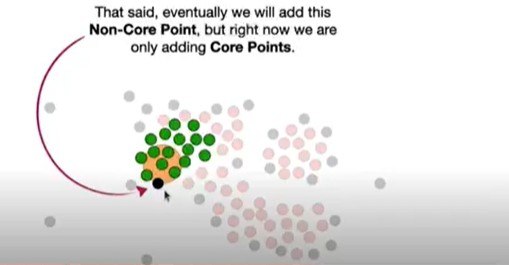

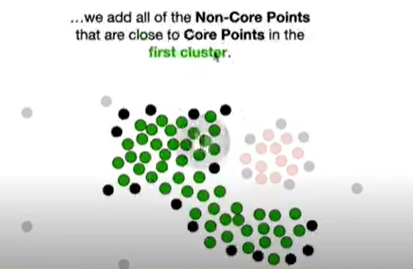

Todos os pontos pretos que não são core points mas estão dentro da região de cluster, iremos marcar eles como se fossem do cluster, só que não vai usar ele pra expandir

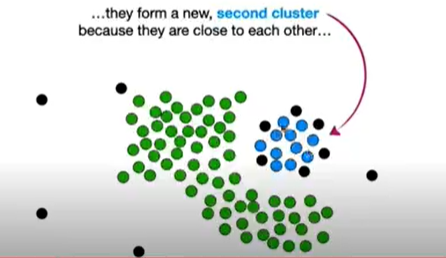

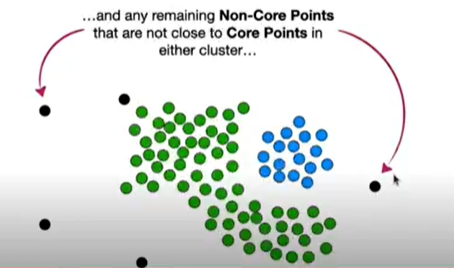

Os pontos pretos que sobraram são classificados com pontos não definidos, ou seja não está em nenhum cluster

PRÁTICA

In [8]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Didatic purposes
import string
from ipywidgets import interact

O dataset tem 5 mil linhas, 2 colunas, 4 clusters

In [9]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


Como aplicamos o DBSCAN...existe um método de classe e função.

Ele pede como obrigatório o EPS e o min_sample, esse játem um default, mas esse default pode não ter nada a ver com a realidade dos dados. Vamos treinar:

In [10]:
# Train DBSCAN
model = DBSCAN()
labels = model.fit_predict(X)

Visualizar os resultados

In [11]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

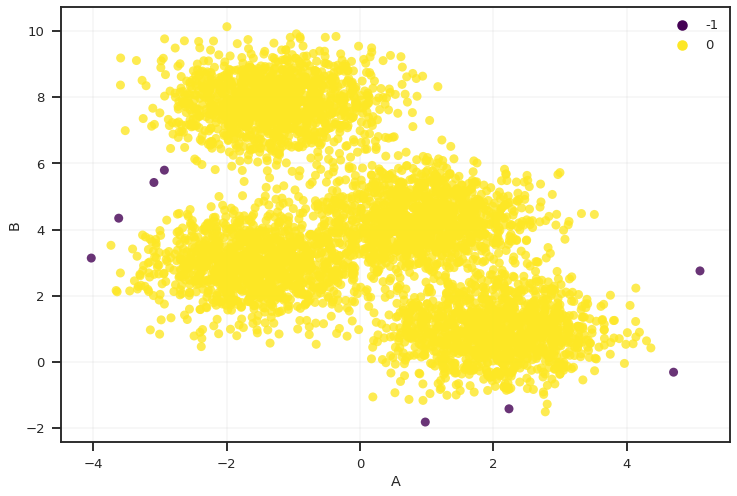

In [12]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

Na figura acima foi utilizado o default, ele retornou 1 cluster de todos os dados com alguns poucos outilers

Agora vamos utilizar função, ele vai pedir variável x e o EPS já está com default, ele vai retornar quais são as observações core e quais são as labels

In [13]:
# Train DBSCAN (function)
labels = dbscan(X)[1]

Plotando tem que dá a mesma coisa do de classe

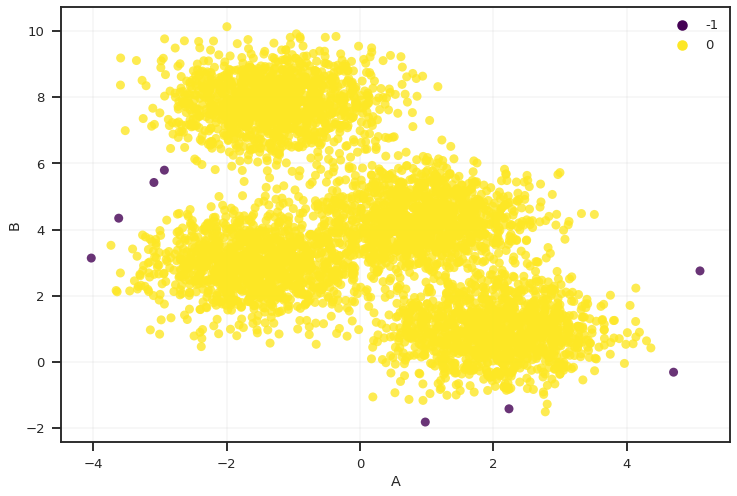

In [14]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [15]:
@interact(eps=(0.01,1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, palette='tab10')
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

O raio do EPS se inicia com 50 por padrão, só observar na figura acima. Diminuindo o raio pra 25 e o outro pra 15

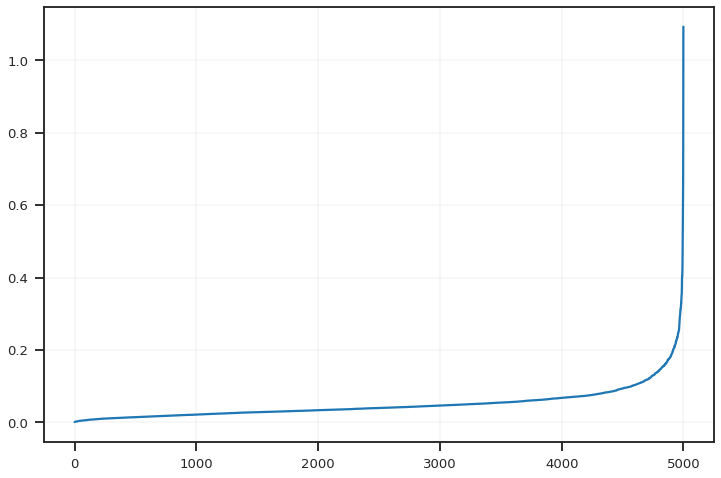

In [17]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

No gráfico acima deve-se pegar o ponto ideal, que é o ponto de curvatura, um pouco menos que 0.2 é um bom valor de raio pra poder separar os grupos. Essa modificação faço no EPS do gráfico interativo feito anteriormente. Já a questão da quantidade mínima tem que ie mexendo pra ver qual é a melhor opção.